<a href="https://colab.research.google.com/github/sergio-cabrales/python/blob/main/PricebyVolume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from scipy import stats, signal
import plotly.express as px
import plotly.graph_objects as go

import pandas_datareader as web
import datetime
import matplotlib.pyplot as plt

In [82]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo',start='2020-03-01', end='2021-03-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-02,75.360001,69.430000,70.570000,74.702499,341397200.0,74.127892
2020-03-03,76.000000,71.449997,75.917503,72.330002,319475600.0,71.773636
2020-03-04,75.849998,73.282501,74.110001,75.684998,219178400.0,75.102829
2020-03-05,74.887497,72.852501,73.879997,73.230003,187572800.0,72.666725
2020-03-06,72.705002,70.307503,70.500000,72.257500,226176800.0,71.701706
...,...,...,...,...,...,...
2021-02-23,126.709999,118.389999,123.760002,125.860001,158273000.0,125.860001
2021-02-24,125.559998,122.230003,124.940002,125.349998,111039900.0,125.349998
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998


In [83]:
fig = px.histogram(df, x=df['Volume'], y=df['Close'], nbins=50, orientation='h')
#fig.plot(df['Close'])
fig.show()

In [84]:
df.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)
start_price = df['Adj_Close'].min()
stop_price = df['Adj_Close'].max()

low = start_price
# delta means granularity in volume aggregation range, it is delta in price
# the volume corresponds to price
delta = (stop_price - start_price)/50    # here we are splitting whole price range into blocks
high = 0

idx_array = []
vol_array = []
low_array = []

while high < stop_price:
    volume = 0    
    high = low + delta
    
    sub_df = df.loc[df['Adj_Close'].between(low, high, inclusive=False)]
    low_array.append(low)

    for i in sub_df.index.values:
        volume = volume + df['Volume'][i]
            
    vol_array.append(volume)
    low = high
   
for idx, var in enumerate(vol_array):
    #print("{}: {}".format(idx, var))
    idx_array.append(idx)

<Figure size 2400x2400 with 0 Axes>

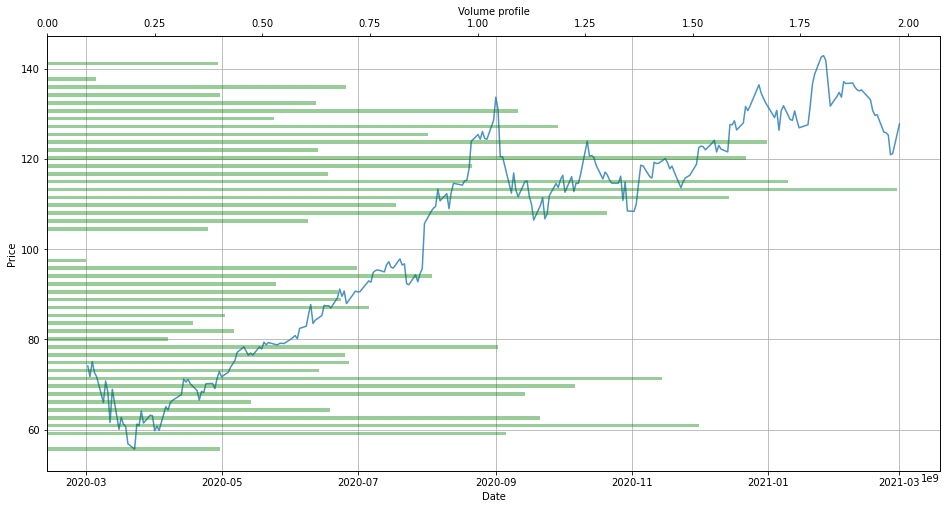

In [85]:
#price and corresponding partial volume profile
plt.figure(figsize=(20, 20), dpi= 120, facecolor='w', edgecolor='k')

#plt.subplot(321)
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(df.index, df['Adj_Close'], alpha=0.8)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Price')

#plt.subplot(322)
ax.twiny()
plt.barh(low_array, vol_array, alpha = 0.4, color='green')
plt.xlabel('Volume profile')
plt.ylabel('Price')

plt.show()

Text(0, 0.5, 'Price')

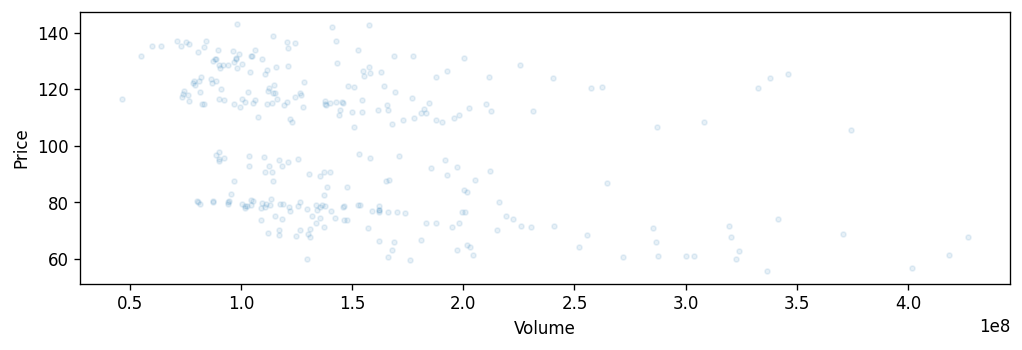

In [59]:
df.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)
plt.figure(figsize=(10, 3), dpi= 120, facecolor='w', edgecolor='k')
plt.scatter(df.Volume, df.Adj_Close, alpha=0.1, marker='.')
plt.xlabel('Volume')
plt.ylabel('Price')